In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'/content/sentiment.csv')
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
data.head(12)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
data.value_counts()

,,count
Sentence,Sentiment,
"Proha Plc ( Euronext :7327 ) announced today ( 19 May ) that its fully-owned subsidiary , Safran Software Solutions AS , has agreed to sell its 49 % share of Safran North America LLC to a SNA Holding AS , an investment group based in Norway .",neutral,2
Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki .,neutral,2
"The report profiles 614 companies including many key and niche players worldwide such as Black & Decker Corporation , Fiskars Corporation , Fiskars Brands , Inc. , Husqvarna Outdoor Products Inc. , K+S Group , Ryobi Technologies , Inc. , The Scotts Miracle-Gro Company , and Van Group , Inc. .",neutral,2
"The company serves customers in various industries , including process and resources , industrial machinery , architecture , building , construction , electrical , transportation , electronics , chemical , petrochemical , energy , and information technology , as well as catering and households .",neutral,2
The issuer is solely responsible for the content of this announcement .,neutral,2
...,...,...
"Finnish steel maker Rautaruukki Oyj ( HEL : RTRKS ) , or Ruukki , said today its net loss contracted to EUR 49 million ( USD 68.2 m ) for the first nine months of 2010 from EUR 229 million for the same period a year ago .",positive,1
Finnish sports equipment maker Amer Sports Oyj ( HEL : AMEAS ) said today that its net loss narrowed to EUR 16.9 million ( USD 22.3 m ) in the second quarter of 2010 from EUR 23.2 million in the corresponding period a year earlier .,positive,1
Finnish sports equipment company Amer Sports said it has decided to lay off 370 workers from its Salomon division in France .,neutral,1


In [ ]:
data['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
data.isnull().sum()

,0
Sentence,0
Sentiment,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
data.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Net sales decreased to EUR 220.5 mn from EUR 4...,neutral
freq,2,3130


In [ ]:
data['Sentiment'] = data['Sentiment'].str.lower()

In [ ]:
print(data)

                                               Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    # Removing stock symbols like $ESI
    text = re.sub(r'\$\w+', '', text)
    # Removing URLs
    text = re.sub(r'http\S+', '', text)
    # Removing punctuation/numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Removing extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#  cleaning
data['cleaned_text'] = data['Sentence'].apply(clean_text)

print(data[['Sentence', 'cleaned_text', 'Sentiment']].head())

                                            Sentence  \
0  The GeoSolutions technology will leverage Bene...   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...   
2  For the last quarter of 2010 , Componenta 's n...   
3  According to the Finnish-Russian Chamber of Co...   
4  The Swedish buyout firm has sold its remaining...   

                                        cleaned_text Sentiment  
0  the geosolutions technology will leverage bene...  positive  
1              on lows down to bk a real possibility  negative  
2  for the last quarter of componenta s net sales...  positive  
3  according to the finnishrussian chamber of com...   neutral  
4  the swedish buyout firm has sold its remaining...   neutral  


In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\$\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
data['cleaned_text'] = data['Sentence'].apply(clean_text)
print(data[['Sentence', 'cleaned_text', 'Sentiment']].head())

                                            Sentence  \
0  The GeoSolutions technology will leverage Bene...   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...   
2  For the last quarter of 2010 , Componenta 's n...   
3  According to the Finnish-Russian Chamber of Co...   
4  The Swedish buyout firm has sold its remaining...   

                                        cleaned_text Sentiment  
0  the geosolutions technology will leverage bene...  positive  
1              on lows down to bk a real possibility  negative  
2  for the last quarter of componenta s net sales...  positive  
3  according to the finnishrussian chamber of com...   neutral  
4  the swedish buyout firm has sold its remaining...   neutral  


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Downloading the VADER lexicon
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']
data['SentimentScore'] = data['cleaned_text'].apply(get_sentiment_score)

# Displaying the first few rows with the new column
print(data[['cleaned_text', 'Sentiment', 'SentimentScore']].tail(12))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                           cleaned_text Sentiment  \
5830  swedish finnish and danish listed companies ar...   neutral   
5831  finnish developer and manufacturer of mobile p...  negative   
5832     operating profit fell to eur mn from eur mn in  negative   
5833  in kemira recorded revenue of approximately eu...   neutral   
5834  investments in product development stood at ml...   neutral   
5835  hsbc says unit to book million charge on settl...  negative   
5836  daily mail parent company in talks with potent...  positive   
5837  rising costs have forced packaging producer hu...  negative   
5838  nordic walking was first used as a summer trai...   neutral   
5839  according shipping company viking line the eu ...   neutral   
5840  in the building and home improvement trade sal...   neutral   
5841  helsinki afx kci konecranes said it has won an...  positive   

      SentimentScore  
5830          0.0000  
5831         -0.1280  
5832          0.4404  
5833      

In [ ]:
from scipy.stats import skew

skewness_value = skew(data['SentimentScore'])
print(f'Skewness of sentiment scores: {skewness_value}')

Skewness of sentiment scores: -0.03948451858709916


In [ ]:
skewness_value = -0.0395 # Using the value from the previous execution

if -0.5 <= skewness_value <= 0.5:
    skewness_interpretation = "approximately symmetrical"
    skewness_implication = "The sentiment scores are relatively evenly distributed around the mean."
elif skewness_value > 0.5:
    skewness_interpretation = "skewed to the right (positively skewed)"
    skewness_implication = "There are more data points with lower sentiment scores, and the tail of the distribution is longer on the positive side."
else: # skewness_value < -0.5
    skewness_interpretation = "skewed to the left (negatively skewed)"
    skewness_implication = "There are more data points with higher sentiment scores, and the tail of the distribution is longer on the negative side."

print(f'Skewness value: {skewness_value}')
print(f'Interpretation: The distribution of sentiment scores is {skewness_interpretation}.')
print(f'Implication: {skewness_implication}')

Skewness value: -0.0395
Interpretation: The distribution of sentiment scores is approximately symmetrical.
Implication: The sentiment scores are relatively evenly distributed around the mean.


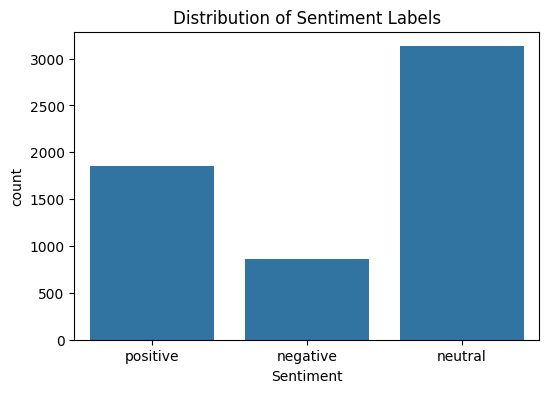

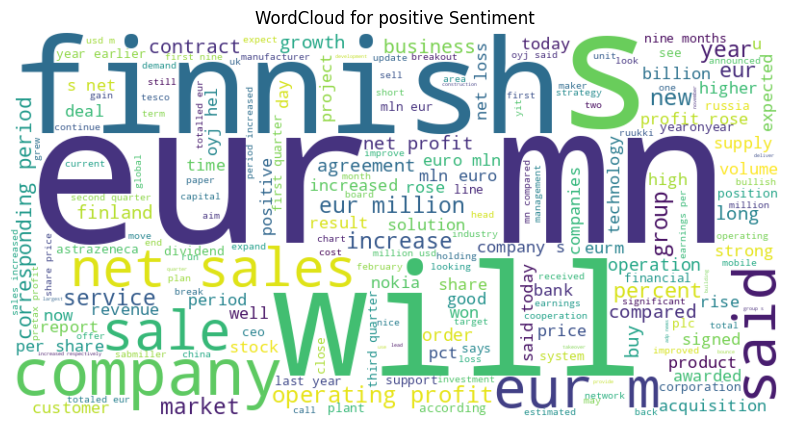

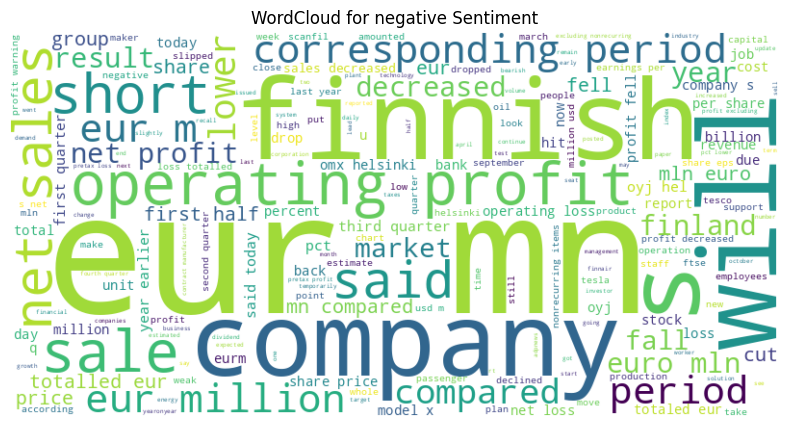

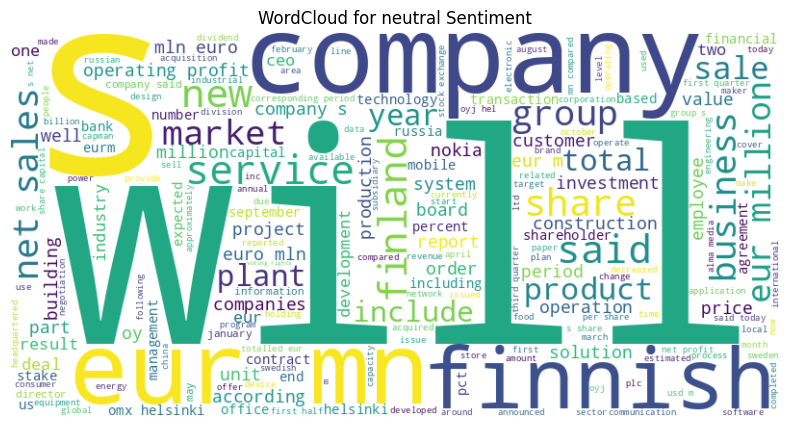

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=data)
plt.title('Distribution of Sentiment Labels')
plt.show()

# Optional: Word clouds for positive and negative sentiment

from wordcloud import WordCloud

def plot_wordcloud(sentiment):
    subset = data[data['Sentiment'] == sentiment]
    text = ' '.join(subset['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Sentiment')
    plt.show()

plot_wordcloud('positive')
plot_wordcloud('negative')
plot_wordcloud('neutral')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['cleaned_text']
y = data['Sentiment']

# Converting text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_vec = vectorizer.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression

# Instantiate and train model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

              precision    recall  f1-score   support

    negative       0.36      0.15      0.21       172
     neutral       0.71      0.89      0.79       626
    positive       0.80      0.68      0.73       371

    accuracy                           0.71      1169
   macro avg       0.62      0.57      0.58      1169
weighted avg       0.69      0.71      0.69      1169

Accuracy Score: 0.7134
Mean Squared Error (MSE): 0.3841
R² Score: 0.1181
Mean Absolute Error (MAE): 0.3191


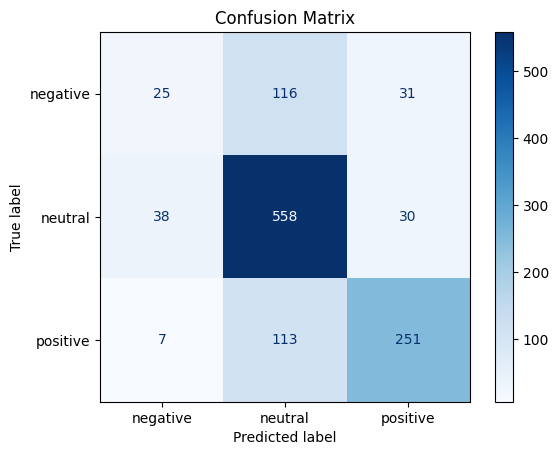

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.4f}')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Calculate R-squared (R2) score
r2 = r2_score(y_test_encoded, y_pred_encoded)
print(f'R² Score: {r2:.4f}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


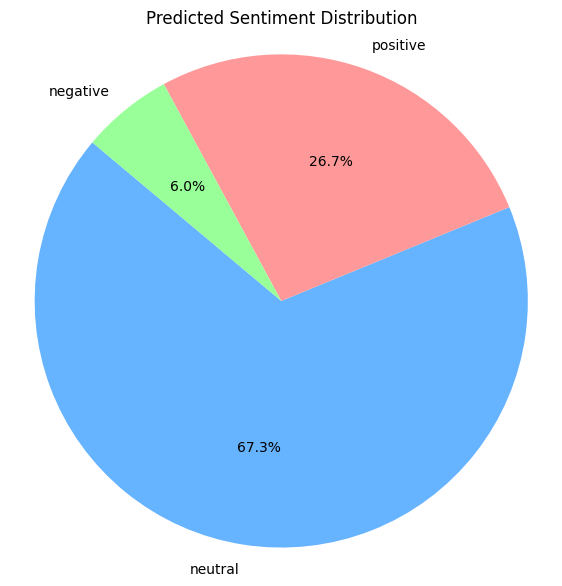

In [ ]:
import matplotlib.pyplot as plt

#  y_pred contains my predicted sentiment labels (e.g., 'positive', 'negative', 'neutral')
pred_counts = pd.Series(y_pred).value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Predicted Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [ ]:

low_row = data.iloc[5115]
print(low_row)

Sentence          Mr. Mikko Saavalainen , head of Comptel 's Glo...
Sentiment                                                   neutral
cleaned_text      mr mikko saavalainen head of comptel s global ...
SentimentScore                                               0.6124
Name: 5115, dtype: object


In [ ]:
import re

# 1. Extract the raw sentence at row 5115 (adjust 'SentenceSentiment0' if your column name differs)
sentence_2 = data.loc[2, 'Sentence']
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\$\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
cleaned_sentence = clean_text(sentence_2)
sentence_vec = vectorizer.transform([cleaned_sentence])

# 5. Predict sentiment using your trained Logistic Regression model
predicted_sentiment = model.predict(sentence_vec)

print(f"Original sentence (row 2): {sentence_2}")
print(f"Predicted Sentiment: {predicted_sentiment[0]}")

Original sentence (row 2): For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
Predicted Sentiment: positive


===== Classification Report =====
              precision    recall  f1-score   support

    negative       0.36      0.15      0.21       172
     neutral       0.71      0.89      0.79       626
    positive       0.80      0.68      0.73       371

    accuracy                           0.71      1169
   macro avg       0.62      0.57      0.58      1169
weighted avg       0.69      0.71      0.69      1169

Accuracy: 0.7134
Weighted Precision: 0.6875
Weighted Recall: 0.7134
Weighted F1-score: 0.6866


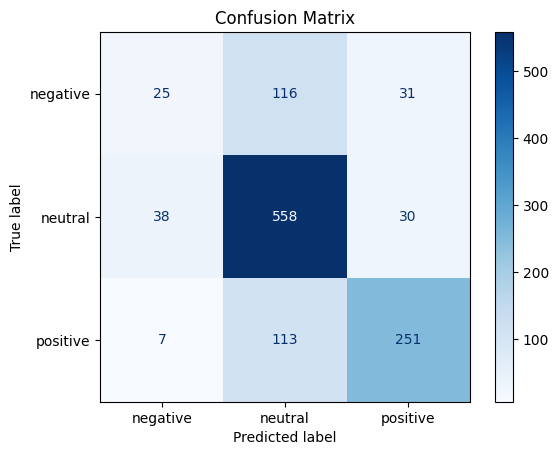

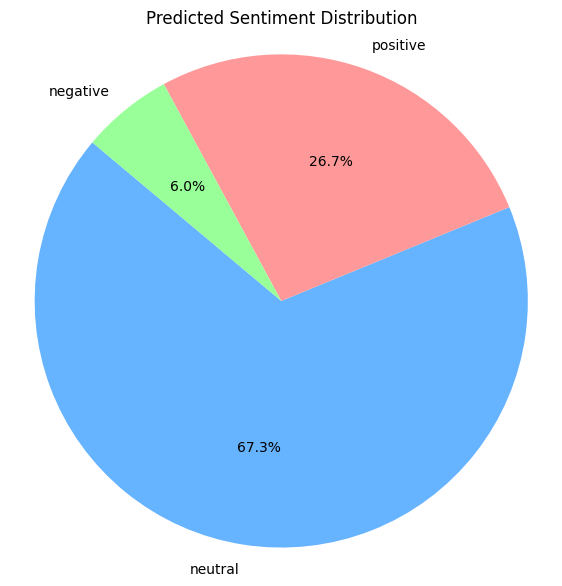


Final Conclusion:
- The model achieves an overall accuracy of 71.34%.
- It performs best on classes with high support and struggles more with minority classes, especially if imbalance exists.
- The confusion matrix and distribution plot highlight the majority of predictions are 'neutral', with fewer 'positive' and very few 'negative' predictions.
- Future work should focus on improving minority class performance through data balancing and advanced modeling, such as domain-specific Transformers (e.g., FinBERT).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_recall_fscore_support, confusion_matrix,
    ConfusionMatrixDisplay
)

def conclude_sentiment_analysis(model, vectorizer, X_test, y_test, y_pred):
    # 1 classification report
    print("===== Classification Report =====")
    print(classification_report(y_test, y_pred))

    #  Overall accuracy and weighted metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall: {recall:.4f}")
    print(f"Weighted F1-score: {f1:.4f}")

    #  confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    #  predicted sentiment distribution pie chart
    pred_counts = pd.Series(y_pred).value_counts()
    plt.figure(figsize=(7,7))
    plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99'])
    plt.title('Predicted Sentiment Distribution')
    plt.axis('equal')
    plt.show()

    print("\nFinal Conclusion:")
    print(f"- The model achieves an overall accuracy of {accuracy:.2%}.")
    print(f"- It performs best on classes with high support and struggles more with minority classes, especially if imbalance exists.")
    print("- The confusion matrix and distribution plot highlight the majority of predictions are 'neutral', with fewer 'positive' and very few 'negative' predictions.")
    print("- Future work should focus on improving minority class performance through data balancing and advanced modeling, such as domain-specific Transformers (e.g., FinBERT).")

conclude_sentiment_analysis(model, vectorizer, X_test, y_test, y_pred)


In [ ]:
import pandas as pd

# Create a DataFrame with actual vs predicted
results_df = pd.DataFrame({
    'Text': data.loc[y_test.index, 'cleaned_text'], # Get cleaned text using y_test indices
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': y_pred
})

# Save to CSV
results_df.to_csv('sentiment_results.csv', index=False)

print("Results saved to sentiment_results.csv")

Results saved to sentiment_results.csv


In [ ]:
import os
import pandas as pd

# Create DataFrame with actual vs predicted (your existing code)
results_df = pd.DataFrame({
    'Text': data.loc[y_test.index, 'cleaned_text'],  # Get cleaned text for test set
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': y_pred
})
file_path = 'sentiment_results.xlsx'
results_df.to_excel(file_path, index=False)
print(f"Results saved to {file_path}")


Results saved to sentiment_results.xlsx


In [ ]:
import pandas as pd
pred_counts = pd.Series(y_pred).value_counts()

#  percentage distribution of each class
pred_percentages = pred_counts / pred_counts.sum() * 100

# Combined counts and percentages into one DataFrame for display
summary_df = pd.DataFrame({
    'Count': pred_counts,
    'Percentage': pred_percentages
}).sort_index()
# Print overall predicted distribution
print("Overall Predicted Sentiment Distribution:")
print(summary_df)

# Optional: Format percentage to 2 decimal places
print("\nFormatted Percentage Distribution:")
print(summary_df.assign(Percentage=lambda x: x.Percentage.map('{:.2f}%'.format)))


Overall Predicted Sentiment Distribution:
          Count  Percentage
negative     70    5.988024
neutral     787   67.322498
positive    312   26.689478

Formatted Percentage Distribution:
          Count Percentage
negative     70      5.99%
neutral     787     67.32%
positive    312     26.69%


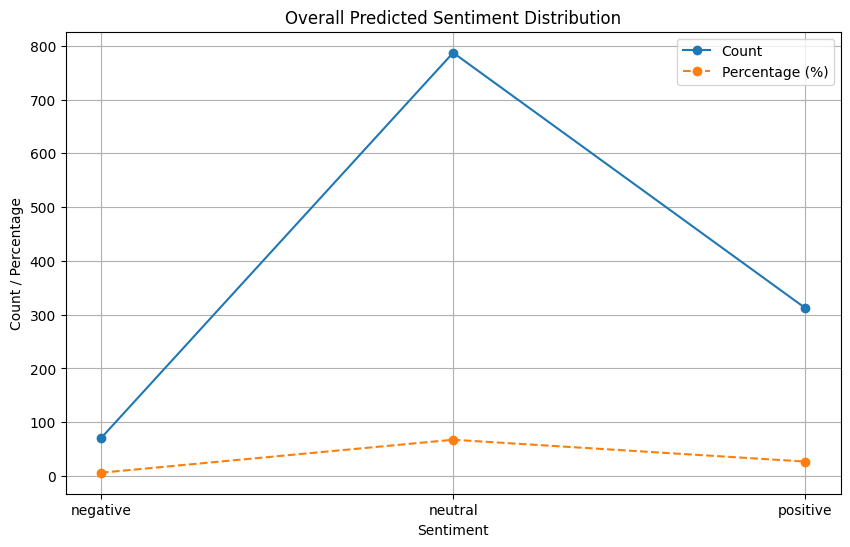

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pred_counts = pd.Series(y_pred).value_counts().sort_index()

#  percentage distribution
pred_percentages = pred_counts / pred_counts.sum() * 100

#  line graph for counts and percentages
plt.figure(figsize=(10, 6))

#  counts line
plt.plot(pred_counts.index, pred_counts.values, marker='o', label='Count')

#  percentages line
plt.plot(pred_percentages.index, pred_percentages.values, marker='o', linestyle='--', label='Percentage (%)')

plt.title('Overall Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count / Percentage')
plt.grid(True)
plt.legend()
plt.show()


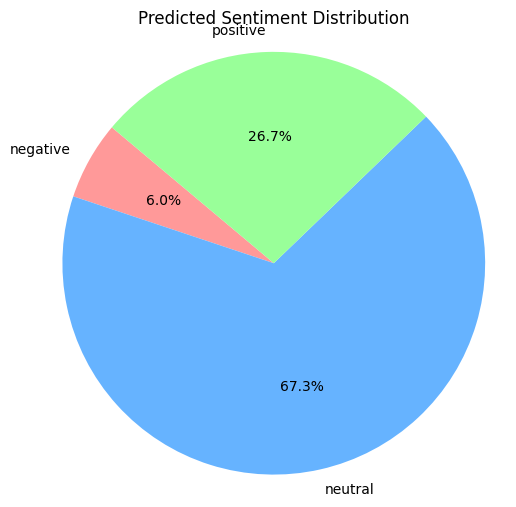

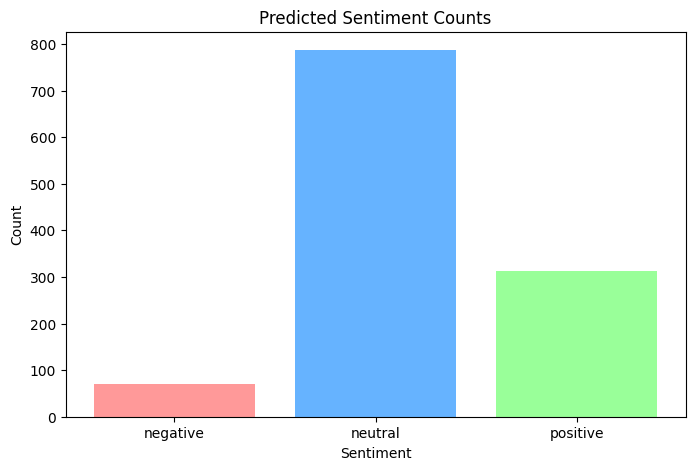

In [ ]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Predicted Sentiment Distribution')
plt.axis('equal')
plt.show()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(pred_counts.index, pred_counts.values, color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Predicted Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
import os
import pandas as pd
# Detailed results dataframe
results_df = pd.DataFrame({
    'Text': data.loc[y_test.index, 'cleaned_text'],
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': y_pred
})

# Summary DataFrame with counts and percentages of predicted classes
pred_counts = pd.Series(y_pred).value_counts().sort_index()
pred_percentages = pred_counts / pred_counts.sum() * 100
summary_df = pd.DataFrame({
    'Count': pred_counts,
    'Percentage': pred_percentages
})
file_path = 'sentiment_analysis_results_for_tableau.xlsx'
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)
    summary_df.to_excel(writer, sheet_name='Summary')

print(f"Sentiment analysis results saved for Tableau at: {file_path}")

Sentiment analysis results saved for Tableau at: sentiment_analysis_results_for_tableau.xlsx
